In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [13]:
try:
    df = pd.read_csv("Gold_Monthly.csv")
    data_dict = df.to_dict(orient='records')

    split_data = [
    row['Date;Price;Open;High;Low;Vol.;Change_%'].split(';')
    for row in data_dict
    ]

    columns = ['Date', 'Price', 'Open', 'High', 'Low', 'Vol.', 'Change_%']
    df = pd.DataFrame(split_data, columns=columns)

    numeric_cols = ['Price', 'Open', 'High', 'Low', 'Change_%']
    df[numeric_cols] = df[numeric_cols].astype(float)

    print(df)

except FileNotFoundError:
    print("file not found")


      Date    Price     Open    High     Low     Vol.  Change_%
0   Jan-17  1291.80  1232.40  1299.6  1232.4    0.05K    0.0464
1   Feb-17  1334.30  1289.00  1323.9  1289.0    0.05K    0.0329
2   Mar-17  1329.80  1307.60  1344.0  1294.0    0.09K   -0.0034
3   Apr-17  1347.10  1333.10  1378.0  1333.1    0.01K    0.0130
4   May-17  1348.50  1326.90  1340.0  1303.2    0.06K    0.0010
5   Jun-17  1314.00  1342.80  1342.8  1313.7    0.01K   -0.0256
6   Jul-17  1340.70  1289.90  1323.6  1282.3    0.03K    0.0203
7   Aug-17  1388.50  1326.40  1393.7  1326.4    0.01K    0.0357
8   Sep-17  1357.60  1406.60  1406.6  1367.3    0.15K   -0.0223
9   Oct-17  1347.70  1353.30  1382.0  1351.7    0.01K   -0.0073
10  Nov-17  1357.30  1382.00  1382.0  1382.0    0.13K    0.0071
11  Dec-17  1391.90  1327.60  1372.1  1327.6    0.08K    0.0255
12  Jan-18  1439.40  1399.00  1399.0  1398.0    0.00K    0.0341
13  Feb-18  1419.20  1419.20  1419.2  1419.2    9.63K   -0.0140
14  Mar-18  1426.00  1433.40  1433.4  14

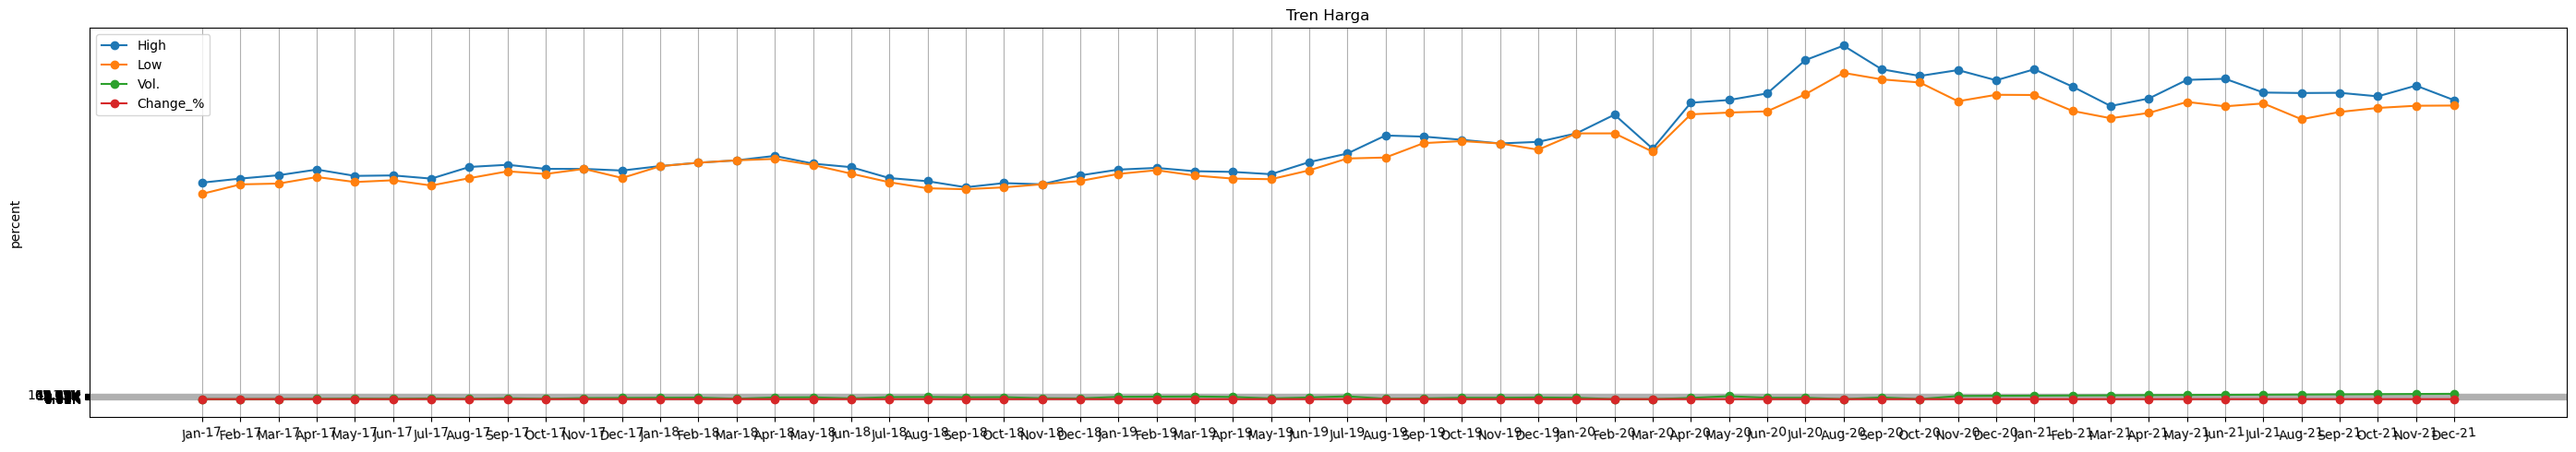

In [17]:
plt.figure(figsize=(28,5))

for data in ['High', 'Low', 'Vol.', 'Change_%']:
    plt.plot(df['Date'], df[data], marker='o', label=data)

plt.title("Tren Harga")
plt.ylabel("percent")
plt.legend()
plt.grid(True)
plt.xticks(rotation=5)
plt.tight_layout()
plt.show()

1577.173333333333


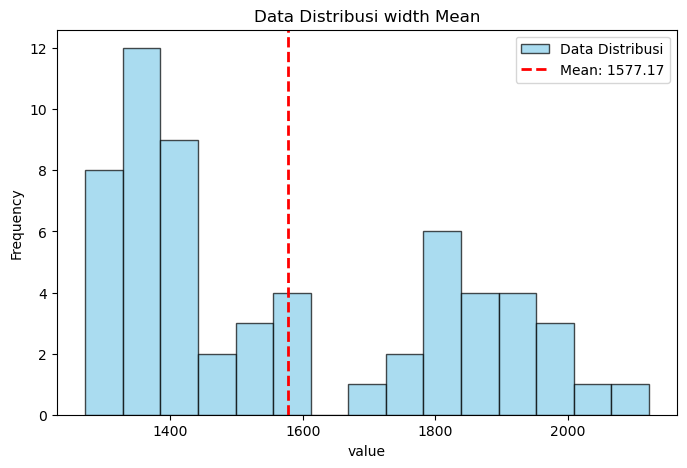

In [23]:
mean_value = np.mean(df["High"])
print(mean_value)
plt.figure(figsize=(8, 5))
plt.hist(df["High"], bins=15,color='skyblue', edgecolor='black', alpha=0.7, label="Data Distribusi")

plt.axvline(mean_value, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')

plt.title('Data Distribusi width Mean')
plt.xlabel('value')
plt.ylabel('Frequency')
plt.legend()

plt.show()

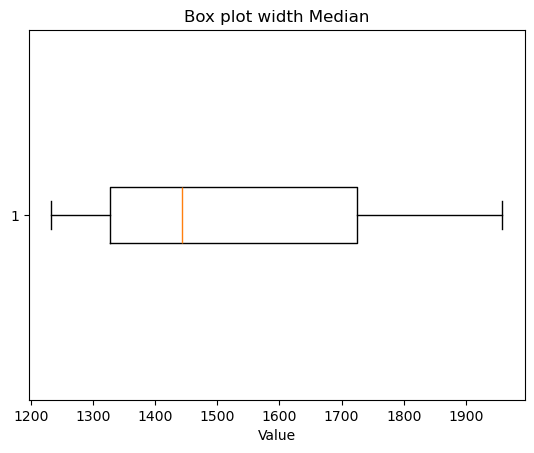

In [27]:
plt.boxplot(df["Low"], vert=False)
plt.title("Box plot width Median")
plt.xlabel("Value")
plt.show()

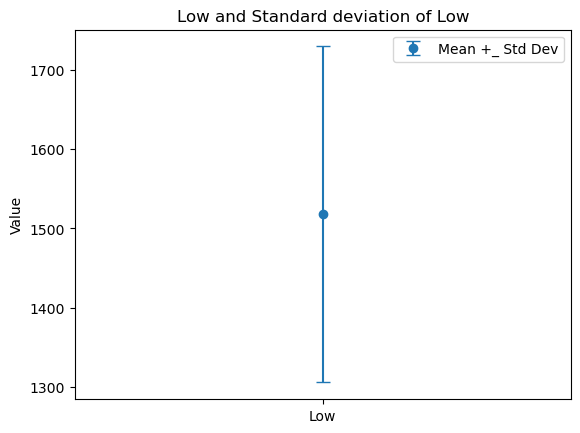

In [29]:
mean_low = df['Low'].mean()
std_low = df['Low'].std()
plt.errorbar(['Low'], [mean_low], yerr=[std_low], fmt='o', capsize=5, label='Mean +_ Std Dev')

plt.title('Low and Standard deviation of Low')
plt.ylabel('Value')
plt.legend()

plt.show()

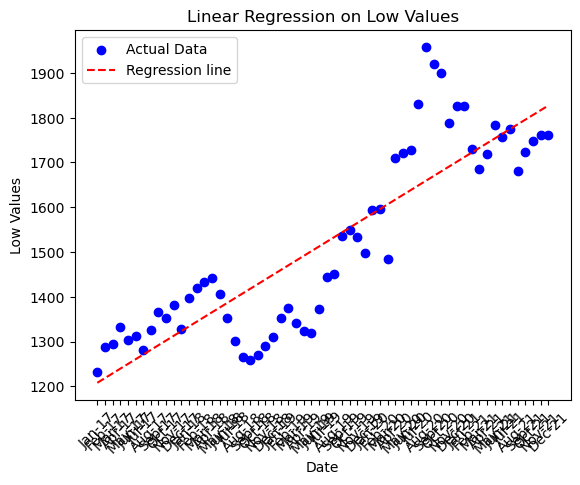

In [37]:
X = np.arange(len(df)).reshape(-1,1)
y = df['Low'].values
model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)
plt.scatter(df['Date'], y, label='Actual Data', color='blue', marker='o')

plt.plot(df['Date'], y_pred, label='Regression line', color='red', linestyle='--')

plt.title('Linear Regression on Low Values')
plt.xlabel('Date')
plt.ylabel('Low Values')
plt.legend()

plt.xticks(rotation=45)

plt.show()